<a href="https://colab.research.google.com/github/Julianpucheta/HCSPD2025/blob/main/Semana%206/Clase_06_Semana_6_Julia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empleo de Julia para simulación de procesos dinámicos

Se debe seleccionar el entorno de ejecución en "Julia".


In [1]:
versioninfo() #setear a Runtime en Julia  https://julialang.org/learning/

Julia Version 1.10.9
Commit 5595d20a287 (2025-03-10 12:51 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = auto


In [2]:
using Plots

Los paquetes se instalan con un instalador que se llama `Pkg`.

In [3]:
using Pkg;

In [4]:
Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [b964fa9f] + LaTeXStrings v1.4.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [5]:
using LaTeXStrings

# El cálculo simbólico en Julia (no reocomendado en sistemas dinámicos)

Emplea el Sympy de Python, por lo que es similar a Python.

In [ ]:
Pkg.add("SymPy")
using SymPy
# Define symbols and functions
t = symbols("t")
c1 = SymFunction("c1")
c2 = SymFunction("c2")
# Define the system of ODEs
g1 = Eq(c2(t), diff(c1(t), t))
g2 = Eq(c1(t), diff(c2(t), t))
# Solve the system with initial conditions
eq = [g1, g2]
res = dsolve(eq, [c1(t), c2(t)], ics=Dict(c1(0)=>1, c2(0)=>0))
# Display the solution
res

In [ ]:
Pkg.add("Symbolics")
Pkg.add("Latexify")

In [ ]:
Pkg.add("ModelingToolkitStandardLibrary") #más breve
# Pkg.add("ModelingToolkit") #avanzado, demora mucho en cargarse

In [ ]:
using ModelingToolkit
using Symbolics, Latexify
using ModelingToolkitStandardLibrary.Blocks # Importing Differential from Blocks module
#or using ModelingToolkit: Differential
# Definir variables simbólicas
@variables t
@variables c1(t) c2(t)

# Definir ecuaciones diferenciales
D = Differential(t) # Now Differential is defined and accessible
eqs = [
    c2 ~ D(c1),
    c1 ~ D(c2)
]

# Resolver el sistema de ecuaciones
sys = ODESystem(eqs)
simplified_eqs = structural_simplify(sys)

# Definir condiciones iniciales
u0 = [
    c1 => 1.0,
    c2 => 0.0
]

# Resolver numéricamente
prob = ODEProblem(simplified_eqs, u0, (0.0, 10.0))
sol = solve(prob, Tsit5())

# Mostrar resultados
println("Solución del sistema:")
println(sol)


In [ ]:
eq

2-element Vector{Sym{PyCall.PyObject}}:
 Eq(c2(t), Derivative(c1(t), t))
 Eq(c1(t), Derivative(c2(t), t))

# Simulación numérica

In [6]:
function modavion(t_etapa, xant, accion)
  a=0.01; b=2; c=100;
  omega=0.2;
  At=1e-3;
  u=accion;
  #%xant=[alfa,fi,fi_p,h]
  alfa=xant[1];
  fi=xant[2];
  fi_p=xant[3];
  h=xant[4];
  x=xant;
  for ii = 1:t_etapa/At
    #%xp=A*x+B*u;
    alfa_p=a*(fi-alfa);
    fi_pp=(-omega^2)*(fi-alfa-b*u);
    h_p=c*alfa;
    xp=[alfa_p,fi_p,fi_pp,h_p];
    x=x+xp*At;
    fi_p=xp[2];
    alfa=x[1];
    fi=x[2];
    fi_p=x[3];
    h=x[4];
  end
  X=x;
end

modavion (generic function with 1 method)

In [7]:
X=-[0, 0,0,0];t_etapa=10e-3;
tF=5.;
Ts=t_etapa;
N_val = tF/Ts;
#=    %
%e=zeros(round(tF/t_etapa),1); =#
u=0;
x2 = Array{Float64, 1}(undef, trunc(Int, N_val)); #una columna con N_val elementos
x4 = Array{Float64, 1}(undef, trunc(Int, N_val)); #una columna con N_val elementos
acc= Array{Float64, 1}(undef, trunc(Int, N_val)); #una columna con N_val elementos
ii=0;
for t=0:t_etapa:tF-t_etapa
  ii=ii+1;
  x2[ii]=X[2];#%Ángulo fi
  x4[ii]=X[4];#%tensión en el capacitor
  X=modavion(t_etapa, X, u);
  acc[ii]=u;
  u=1;
end
t=0:t_etapa:tF-t_etapa;

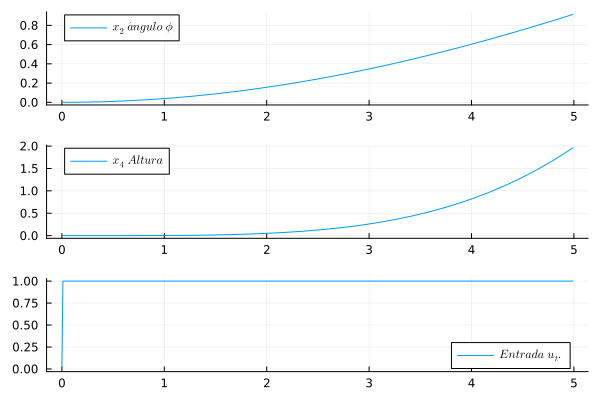

In [8]:
P1=plot(t, x2, label=L"x_2 \ \'angulo \  \phi", lw=1)
P2=plot(t, x4, label=L"x_4 \ Altura", lw=1)
P3=plot(t, acc, label=L"Entrada \ u_t.", lw=1)
plot(P1, P2, P3, layout=(3,1) )
#plot(P1, P2, P3, layout=grid(3, 1, heights=[0.8 ,0.2, 1.1]))

# Cierre


Impresión a un archivo pdf con marcadores en cada título.

In [ ]:
!apt-get upgrade
# !apt-get update #Casi nunca es necesario

In [ ]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic  --fix-missing #funciona ok

In [ ]:
%%shell
sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!pip install pandoc

In [ ]:
%%shell
sudo apt-get install pandoc

In [ ]:
import pandoc

In [ ]:
import nbconvert # Luego, debe descargarse el nb actual y subirse al entorno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Go to the directory where your file is
# %cd /content/gdrive/MyDrive/Colab Notebooks
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Verify that now you see your notebooks
!ls

In [ ]:
#Da mensajes de WARNING, pero funciona.
%%shell
pandoc --to pdf --pdf-engine=xelatex  --from ipynb -o 'Clase_06_Semana_6_Julia.pdf' 'Clase_06_Semana_6_Julia.ipynb'

In [ ]:
%%shell
# jupyter nbconvert --to html /content/TP_Nº1.ipynb
jupyter nbconvert --to html Clase_06_Semana_6_Julia.ipynb
### Descargar el html y luego imprimirlo a pdf